<a href="https://colab.research.google.com/github/varun-beep/Computer_VisionLab/blob/main/cv_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

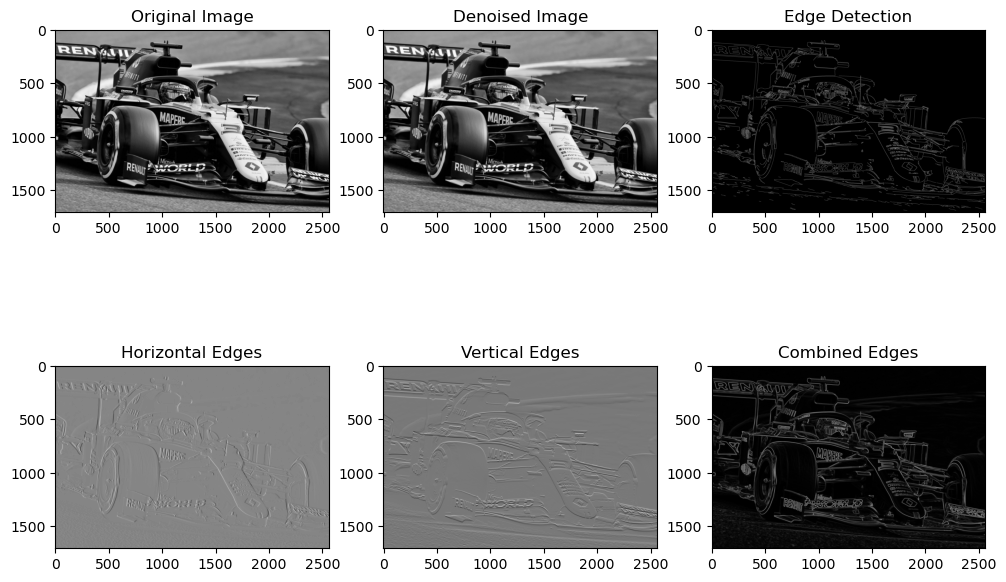

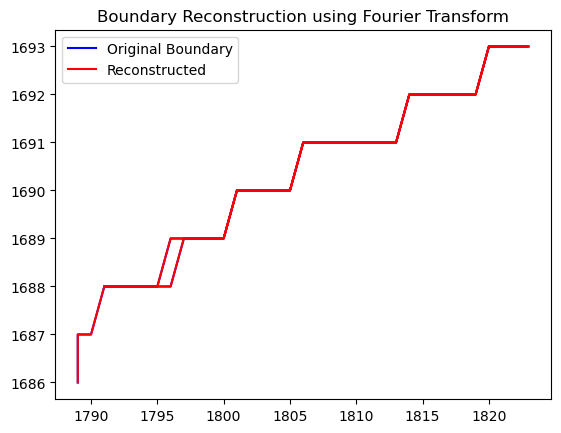

Fourier Descriptors are used as Scale, Translation, and Rotation Invariance descriptors:
- Scale Invariance: Normalizing the Fourier coefficients makes them independent of object size.
- Translation Invariance: Ignoring the first coefficient ensures independence from object position.
- Rotation Invariance: Computing the magnitude of Fourier coefficients removes phase differences.

Applications of Fast Fourier Transform (FFT):
1. Image and Signal Processing (Edge detection, noise filtering)
2. Audio Compression and Speech Recognition
3. Biomedical Signal Analysis (EEG, ECG)
4. Seismic Data Analysis
5. Wireless Communication and Radar Systems
6. Computer Vision and Object Recognition
7. Quantum Computing and Cryptography


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import sys

# Load the image
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Error: Unable to load image. Check the file path.")
    return image

# Apply noise removal using Gaussian blur
def remove_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Apply edge detection using Canny
def edge_detection(image):
    return cv2.Canny(image, 50, 150)

# Detect horizontal and vertical edges using Sobel filters
def detect_edges(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Horizontal edges
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Vertical edges
    combined = cv2.magnitude(sobelx, sobely)
    return sobelx, sobely, combined

# Apply Fourier Transform to boundary points
def fourier_transform(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("No contours detected. Try adjusting the edge detection parameters.")

    contour = contours[0][:, 0, :]
    x, y = contour[:, 0], contour[:, 1]
    complex_signal = x + 1j * y
    fourier_coeffs = fft(complex_signal)
    return fourier_coeffs, contour

# Reconstruct boundary using selected Fourier coefficients
def reconstruct_boundary(fourier_coeffs, num_coeffs):
    truncated_coeffs = np.zeros_like(fourier_coeffs, dtype=complex)
    truncated_coeffs[:num_coeffs] = fourier_coeffs[:num_coeffs]
    reconstructed = ifft(truncated_coeffs)
    return reconstructed.real, reconstructed.imag

# Display results
def display_results(image, denoised_image, edges, sobelx, sobely, combined, contour, reconstructed_x, reconstructed_y):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(2, 3, 2), plt.imshow(denoised_image, cmap='gray'), plt.title('Denoised Image')
    plt.subplot(2, 3, 3), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
    plt.subplot(2, 3, 4), plt.imshow(sobelx, cmap='gray'), plt.title('Horizontal Edges')
    plt.subplot(2, 3, 5), plt.imshow(sobely, cmap='gray'), plt.title('Vertical Edges')
    plt.subplot(2, 3, 6), plt.imshow(combined, cmap='gray'), plt.title('Combined Edges')
    plt.show()

    plt.figure()
    plt.plot(contour[:, 0], contour[:, 1], 'b', label='Original Boundary')
    plt.plot(reconstructed_x, reconstructed_y, 'r', label='Reconstructed')
    plt.legend()
    plt.title('Boundary Reconstruction using Fourier Transform')
    plt.show()

# Main function
def main(image_path):
    image = load_image(image_path)
    denoised_image = remove_noise(image)
    edges = edge_detection(denoised_image)
    sobelx, sobely, combined = detect_edges(denoised_image)
    fourier_coeffs, contour = fourier_transform(edges)
    reconstructed_x, reconstructed_y = reconstruct_boundary(fourier_coeffs, 50)

    display_results(image, denoised_image, edges, sobelx, sobely, combined, contour, reconstructed_x, reconstructed_y)

    # Justification of Fourier descriptors' invariance
    print("Fourier Descriptors are used as Scale, Translation, and Rotation Invariance descriptors:")
    print("- Scale Invariance: Normalizing the Fourier coefficients makes them independent of object size.")
    print("- Translation Invariance: Ignoring the first coefficient ensures independence from object position.")
    print("- Rotation Invariance: Computing the magnitude of Fourier coefficients removes phase differences.")

    # Applications of Fast Fourier Transform (FFT)
    print("\nApplications of Fast Fourier Transform (FFT):")
    print("1. Image and Signal Processing (Edge detection, noise filtering)")
    print("2. Audio Compression and Speech Recognition")
    print("3. Biomedical Signal Analysis (EEG, ECG)")
    print("4. Seismic Data Analysis")
    print("5. Wireless Communication and Radar Systems")
    print("6. Computer Vision and Object Recognition")
    print("7. Quantum Computing and Cryptography")

# Run the function with the given image
if __name__ == "__main__":
    image_path = "renault.png"  # Change this if your image is in a different location
    main(image_path)